In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from matplotlib import image
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization , Dropout, Input
from tensorflow.keras.applications.efficientnet import EfficientNetB0

## Preprocessing

In [2]:
# Defining get_images fun to getting image and storing it in an array
c_tr = [] ; c_lab_tr = []
c_te = [] ; c_lab_te = []


b_tr = [] ; b_lab_tr = []
b_te = [] ; b_lab_te = []


def get_images(directory,t):

    for image_file in os.listdir(directory):
        image = cv2.imread(directory + '/' + image_file)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(img_rgb, (224,224))
    
        t.append(image)

In [3]:
# Getting train and test images
get_images(r'E:/Datasets/Cars Vs Bikes (Hand Made)/Cars', c_tr)

c_tr = np.array(c_tr)
c_lab_tr = np.ones(len(c_tr)) # Ones are the labels for cars
c_lab_tr = np.array(c_lab_tr)


get_images(r'E:/Datasets/Cars Vs Bikes (Hand Made)/Bikes', b_tr)

b_tr = np.array(b_tr)
b_lab_tr = np.zeros(len(b_tr)) # Zeros are the labels for bikes
b_lab_tr = np.array(b_lab_tr)

In [4]:
xtrain = np.concatenate([c_tr,b_tr], axis=0)
ytrain = np.concatenate([c_lab_tr,b_lab_tr], axis=0)

xtrain, ytrain = shuffle(xtrain, ytrain, random_state=0)

In [5]:
# Using pretrained model EfficientNetB0
efn_model = EfficientNetB0(include_top = False)
efn_model.trainable = False

efn_model.summary()    

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [6]:
# Creating Sequential model and training it
model = Sequential([
    Input(shape=(224,224,3)),
    efn_model,
    BatchNormalization(),
    Flatten(),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

m = model.fit(xtrain, ytrain, batch_size=16, validation_split= 0.1, epochs=10)

Epoch 1/10
45/45 [==============================] - 17s 215ms/step - loss: 0.1728 - accuracy: 0.9707 - val_loss: 0.2169 - val_accuracy: 0.9875
Epoch 2/10
45/45 [==============================] - 7s 164ms/step - loss: 0.0798 - accuracy: 0.9958 - val_loss: 0.4992 - val_accuracy: 0.9875
Epoch 3/10
45/45 [==============================] - 7s 166ms/step - loss: 6.3555e-05 - accuracy: 1.0000 - val_loss: 0.4755 - val_accuracy: 0.9875
Epoch 4/10
45/45 [==============================] - 18s 409ms/step - loss: 0.0012 - accuracy: 0.9986 - val_loss: 0.5471 - val_accuracy: 0.9750
Epoch 5/10
45/45 [==============================] - 7s 165ms/step - loss: 0.0191 - accuracy: 0.9958 - val_loss: 0.6563 - val_accuracy: 0.9750
Epoch 6/10
45/45 [==============================] - 7s 164ms/step - loss: 5.7070e-06 - accuracy: 1.0000 - val_loss: 0.7302 - val_accuracy: 0.9750
Epoch 7/10
45/45 [==============================] - 7s 164ms/step - loss: 0.0341 - accuracy: 0.9972 - val_loss: 0.0671 - val_accuracy: 0.9

In [7]:
# Saving the model
model.save('CNN_model.h5')

C:\Users\DEV\anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


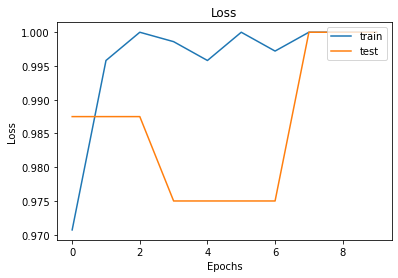

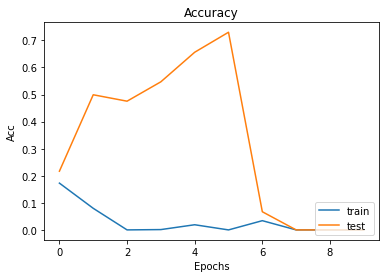

In [8]:
# Plotting graph for Accuracy and loss
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [9]:
# Loading trained model
new_model = load_model('cnn_model.h5')

Prediction is : Bike


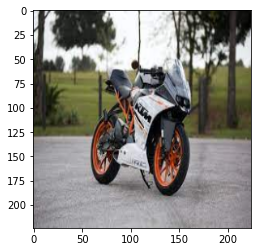

In [10]:
# Prediction 
img = cv2.imread(r'C:\Users\DEV\Downloads\download (1).jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_rgb, (224,224))
plt.imshow(img)

img = np.expand_dims(img, axis=0)
pred = new_model.predict([img])
if(np.argmax(pred) == 0):
    print('\033[1m' + "Prediction is : Bike")
else:
    print('\033[1m' + "Prediction is : Car")

Prediction is : Car


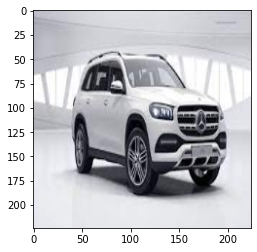

In [11]:
# Prediction
img = cv2.imread(r'C:\Users\DEV\Downloads\download.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_rgb, (224,224))
plt.imshow(img)

img = np.expand_dims(img, axis=0)
pred = new_model.predict([img])
if(np.argmax(pred) == 0):
    print('\033[1m' + "Prediction is : Bike")
else:
    print('\033[1m' + "Prediction is : Car")